<a href="https://colab.research.google.com/github/ALOK-077/MY_Cats-v-dogs-classifiaction/blob/main/MY_Cats_v_dogs_classifiaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/ALOK-077/MY_Cats-v-dogs-classifiaction.git

Cloning into 'MY_Cats-v-dogs-classifiaction'...


In [ ]:
import os
os.environ[ ' KAGGLE CONFIG_DIR'] = '/content'

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:28<00:00, 45.8MB/s]
100% 1.06G/1.06G [00:28<00:00, 40.3MB/s]


In [ ]:
!chmod 600 /content/kaggle.json

chmod: cannot access '/content/kaggle.json': No such file or directory


In [ ]:
!unzip /content/dogs-vs-cats.zip -d /content/


Streaming output truncated to the last 5000 lines.
  inflating: /content/train/dogs/dog.4419.jpg  
  inflating: /content/train/dogs/dog.442.jpg  
  inflating: /content/train/dogs/dog.4420.jpg  
  inflating: /content/train/dogs/dog.4421.jpg  
  inflating: /content/train/dogs/dog.4422.jpg  
  inflating: /content/train/dogs/dog.4424.jpg  
  inflating: /content/train/dogs/dog.4425.jpg  
  inflating: /content/train/dogs/dog.4426.jpg  
  inflating: /content/train/dogs/dog.4427.jpg  
  inflating: /content/train/dogs/dog.4431.jpg  
  inflating: /content/train/dogs/dog.4433.jpg  
  inflating: /content/train/dogs/dog.4436.jpg  
  inflating: /content/train/dogs/dog.4438.jpg  
  inflating: /content/train/dogs/dog.4439.jpg  
  inflating: /content/train/dogs/dog.444.jpg  
  inflating: /content/train/dogs/dog.4440.jpg  
  inflating: /content/train/dogs/dog.4441.jpg  
  inflating: /content/train/dogs/dog.4442.jpg  
  inflating: /content/train/dogs/dog.4443.jpg  
  inflating: /content/train/dogs/dog.44

In [ ]:
from keras.preprocessing.image import ImageDataGenerator


In [ ]:
datagen = ImageDataGenerator(
    rescale=1./255,           # Normalize the image pixel values to the range [0, 1]
    rotation_range=40,        # Randomly rotate images by up to 40 degrees
    width_shift_range=0.2,    # Randomly shift images horizontally by up to 20% of the width
    height_shift_range=0.2,   # Randomly shift images vertically by up to 20% of the height
    shear_range=0.2,          # Randomly apply shearing transformations
    zoom_range=0.2,           # Randomly zoom into images
    horizontal_flip=True,     # Randomly flip images horizontally
    fill_mode='nearest'       # Fill in new pixels created by transformations
)


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)


In [ ]:
train_generator = train_datagen.flow_from_directory(
    '/content/train',         # Directory with training images
    target_size=(256, 256),   # Resize images to 256x256
    batch_size=32,            # Batch size
    class_mode='binary'       # Binary classification
)

validation_generator = validation_datagen.flow_from_directory(
    '/content/test',          # Directory with validation images
    target_size=(256, 256),   # Resize images to 256x256
    batch_size=32,            # Batch size
    class_mode='binary'       # Binary classification
)


Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model using the generators
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10
)


Epoch 1/10
625/625 [==============================] - 365s 568ms/step - loss: 1.1987 - accuracy: 0.5737 - val_loss: 0.6252 - val_accuracy: 0.6364
Epoch 2/10
625/625 [==============================] - 354s 567ms/step - loss: 0.6453 - accuracy: 0.6279 - val_loss: 0.7523 - val_accuracy: 0.5565
Epoch 3/10
625/625 [==============================] - 352s 564ms/step - loss: 0.6087 - accuracy: 0.6622 - val_loss: 0.7536 - val_accuracy: 0.5539
Epoch 4/10
625/625 [==============================] - 353s 564ms/step - loss: 0.5780 - accuracy: 0.6988 - val_loss: 0.5784 - val_accuracy: 0.6975
Epoch 5/10
625/625 [==============================] - 352s 563ms/step - loss: 0.5587 - accuracy: 0.7148 - val_loss: 0.6202 - val_accuracy: 0.6392
Epoch 6/10
 65/625 [==>...........................] - ETA: 4:54 - loss: 0.5457 - accuracy: 0.7264

In [ ]:
# Evaluate the model on the validation dataset
loss, accuracy = model.evaluate(validation_ds)

# Print the accuracy
print(f'Validation Accuracy: {accuracy*100:.2f}%')


157/157 [==============================] - 7s 44ms/step - loss: 0.5241 - accuracy: 0.8222
Validation Accuracy: 82.22%


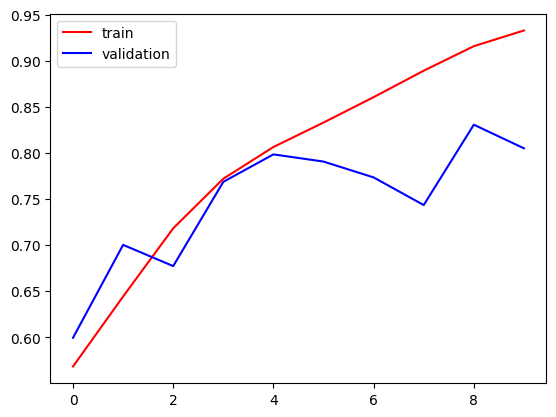

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',  label='validation')
plt.legend()
plt.show()

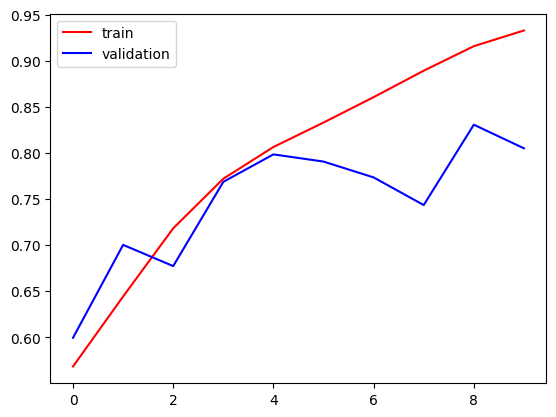

In [ ]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

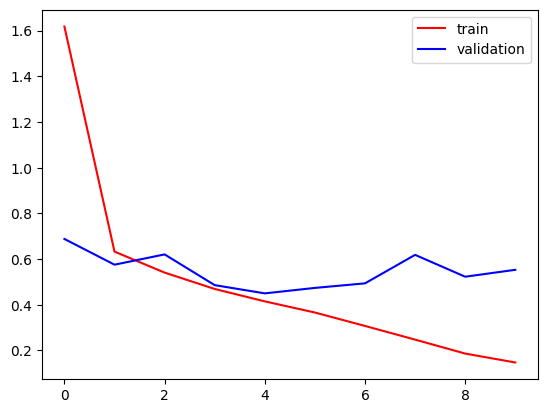

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

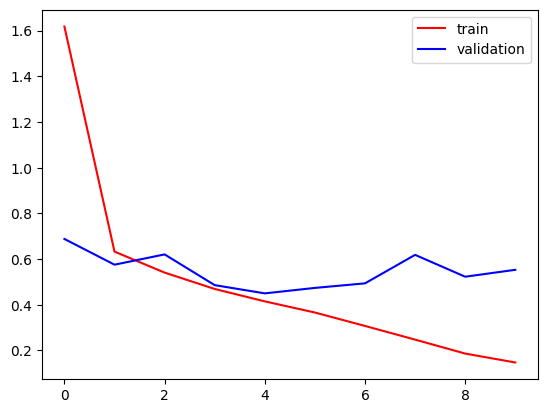

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
# ways to reduce overfitting

# Add more data
# Data Augmentation -> next video
# L1/L2 Regularizer
# Dropout
# Batch Norm
# Reduce complexity

In [ ]:
import cv2

In [ ]:
test_img = cv2.imread('/content/peri-stojnic-5Vr_RVPfbMI-unsplash.jpg')

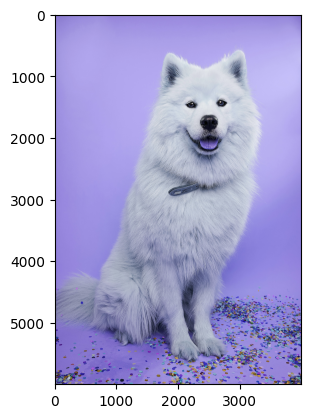

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(6000, 4000, 3)

In [ ]:
test_img = cv2.resize(test_img,(256,256))

In [ ]:
test_input = test_img.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 18ms/step


array([[0.]], dtype=float32)